# Восстановление золота из руды

Подготовьте прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Вам нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

Чтобы выполнить проект, обращайтесь к библиотекам *pandas*, *matplotlib* и *sklearn.* Вам поможет их документация.

## Подготовка данных

### Описание данных
**Технологический процесс**
- Rougher feed — исходное сырье
- Rougher additions (или reagent additions) — флотационные реагенты: Xanthate, Sulphate, Depressant
- Xanthate **— ксантогенат (промотер, или активатор флотации);
- Sulphate — сульфат (на данном производстве сульфид натрия);
- Depressant — депрессант (силикат натрия).
- Rougher process (англ. «грубый процесс») — флотация
- Rougher tails — отвальные хвосты
- Float banks — флотационная установка
- Cleaner process — очистка
- Rougher Au — черновой концентрат золота
- Final Au — финальный концентрат золота   

**Параметры этапов**
- air amount — объём воздуха
- fluid levels — уровень жидкости
- feed size — размер гранул сырья
- feed rate — скорость подачи

### Наименование признаков
**Наименование признаков должно быть такое:**  
[этап].[тип_параметра].[название_параметра]  
Пример: rougher.input.feed_ag

**Возможные значения для блока [этап]:**
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

**Возможные значения для блока [тип_параметра]:**
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

### Импорт библиотек и файлов

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
train_data = pd.read_csv('/datasets/gold_recovery_train_new.csv')
test_data = pd.read_csv('/datasets/gold_recovery_test_new.csv')
full_data = pd.read_csv('/datasets/gold_recovery_full_new.csv')

In [3]:
train_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


In [5]:
test_data.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

In [7]:
full_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [8]:
full_data.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


**Промежуточный вывод:**
- В данных необходимо заполнить пропуски
- В колонках date целесообразно будет изменить тип данных на datetime

### Проверка правильности рассчёта эффективности обогащения
Для этого вычислим recovery вручную и сравним с rougher.output.recovery  
Формула: ((C*(F-T))/(F*(C-T)))*100, где:
- С - доля золота концентрате после фильтрации/очитски
- F - доля золота в сырье/концентрате до флотации/очистки
- T - доля золота в отвальных хвостах после фильтрации/очистки

In [9]:
C = train_data['rougher.output.concentrate_au']
F = train_data['rougher.input.feed_au']
T = train_data['rougher.output.tail_au']

recovery = ((C*(F-T))/(F*(C-T)))*100

In [10]:
mean_absolute_error(train_data['rougher.output.recovery'], recovery)

9.73512347450521e-15

Полученное значение MAE мало, из чего следует, что расчёты верны.

### Признаки, недоступные в тестовой выборке

In [11]:
missed_features = set(full_data.columns ^ test_data.columns)
missed_features

{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta

В тестовой выборке в основном отсутствуют данные о параметрах продукта и расчётных характеристиках.  
Вероятно, эти данные получают на более поздних этапах.

### Предобработка данных
Сначала изменим тип данных в колонках даты

In [12]:
full_data['date'] = pd.to_datetime(full_data['date'], format='%Y-%m-%d %H:%M:%S')
train_data['date'] = pd.to_datetime(train_data['date'], format='%Y-%m-%d %H:%M:%S')
test_data['date'] = pd.to_datetime(test_data['date'], format='%Y-%m-%d %H:%M:%S')

А затем заполним отсутствующие значения близлежащими

In [13]:
full_data = full_data.fillna(method='ffill')
train_data = train_data.fillna(method='ffill')
test_data = test_data.fillna(method='ffill')

Теперь взглянем на результат манипуляций на примере info полных данных

In [14]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   date                                                19439 non-null  datetime64[ns]
 1   final.output.concentrate_ag                         19439 non-null  float64       
 2   final.output.concentrate_pb                         19439 non-null  float64       
 3   final.output.concentrate_sol                        19439 non-null  float64       
 4   final.output.concentrate_au                         19439 non-null  float64       
 5   final.output.recovery                               19439 non-null  float64       
 6   final.output.tail_ag                                19439 non-null  float64       
 7   final.output.tail_pb                                19439 non-null  float64       
 8   final.

Теперь данные предобработаны и готовы к работе

## Анализ данных

### Изменение концентрации металлов (Au, Ag, Pb) на различных этапах очистки

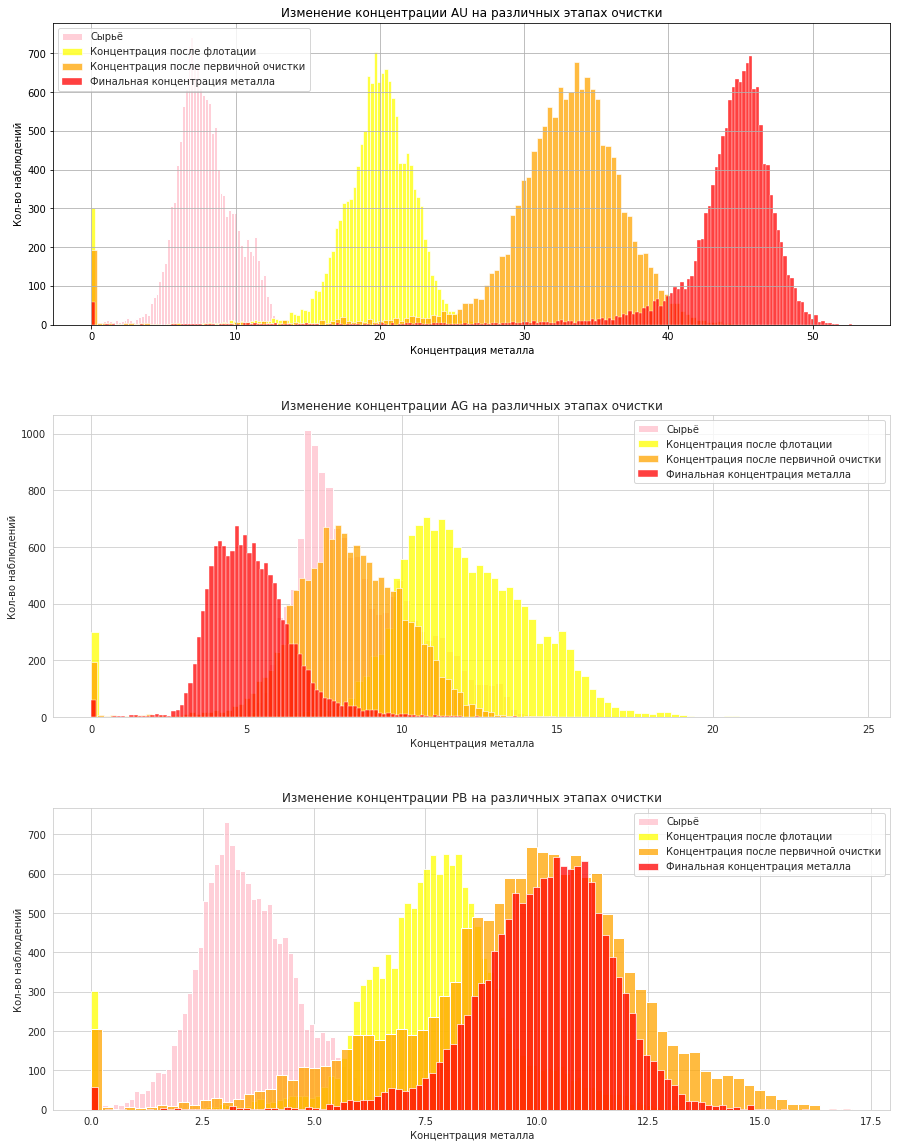

In [15]:
pos = 1
plt.figure(figsize=[15, 20])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for metal in ['au', 'ag', 'pb']:
    plt.subplot(3, 1, pos)
    sns.set_style('whitegrid')
    plt.grid(True)
    plt.title(f'Изменение концентрации {metal.upper()} на различных этапах очистки')
    sns.histplot(train_data[f'rougher.input.feed_{metal}'], \
                 color='pink', label='Сырьё', kde=False)
    sns.histplot(train_data[f'rougher.output.concentrate_{metal}'], \
                 color='yellow', label='Концентрация после флотации', kde=False)
    sns.histplot(train_data[f'primary_cleaner.output.concentrate_{metal}'], \
                 color='orange', label='Концентрация после первичной очистки', kde=False)
    sns.histplot(train_data[f'final.output.concentrate_{metal}'], \
                 color='red', label='Финальная концентрация металла', kde=False)
    plt.xlabel('Концентрация металла')
    plt.ylabel('Кол-во наблюдений')
    plt.legend()
    pos += 1
plt.show()

- Доля золота после каждого этапа очистки планомерно увеличивается
- Доля серебра увеличивается на этапе флотации, после чего постепенно уменьшается
- Доля свинца увеличивается на этапе флотации и после первичной очистки, затем остается неизменной

### Сравнение распределения размеров гранул сырья на обучающей и тестовой выборках

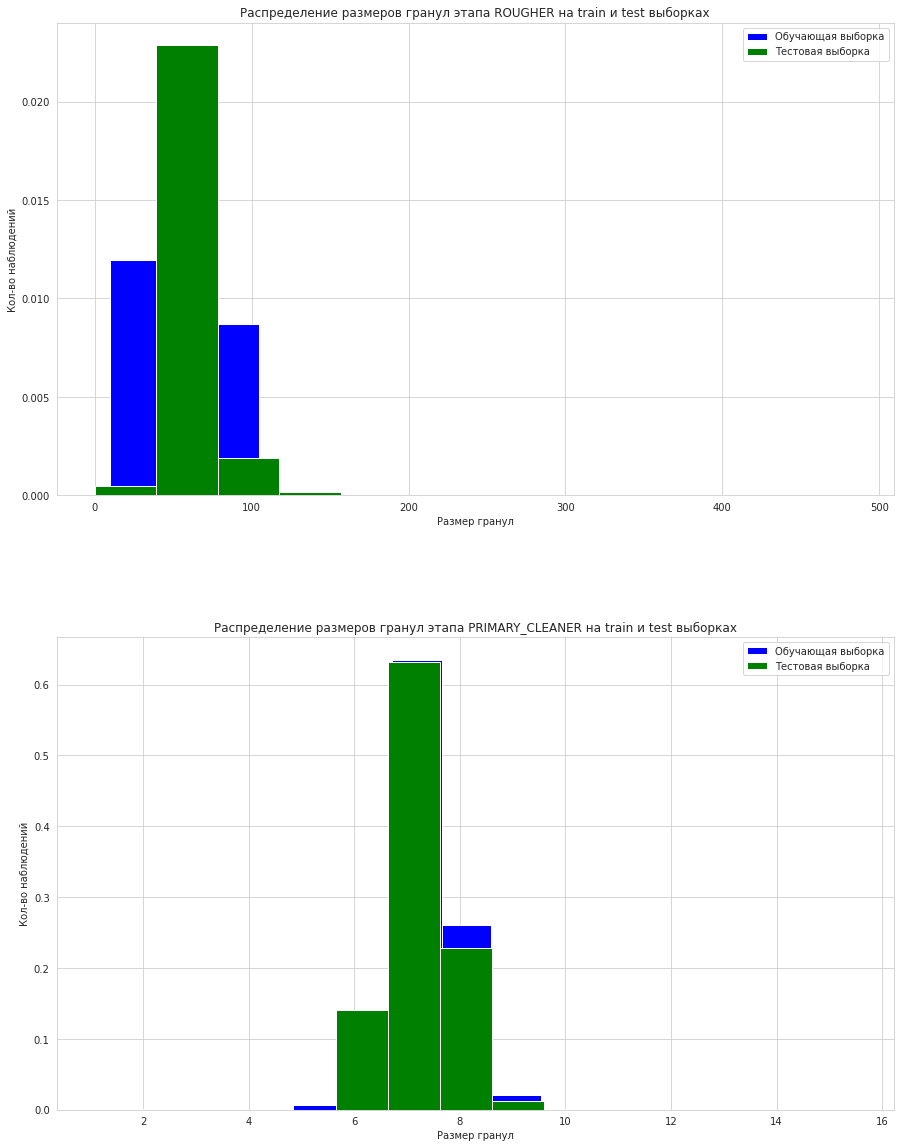

In [16]:
pos = 1
plt.figure(figsize=[15, 20])
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for stage in ['rougher', 'primary_cleaner']:
    plt.subplot(2, 1, pos)
    sns.set_style('whitegrid')
    plt.grid(True)
    plt.title(f'Распределение размеров гранул этапа {stage.upper()} на train и test выборках')
    plt.hist(train_data[f'{stage}.input.feed_size'], \
             color='blue', label='Обучающая выборка', density=True)
    plt.hist(test_data[f'{stage}.input.feed_size'], \
             color='green', label='Тестовая выборка', density=True)
    plt.xlabel('Размер гранул')
    plt.ylabel('Кол-во наблюдений')
    plt.legend()
    pos += 1
plt.show()

- На этапах флотации и первичной очистки распределение размеров гранул сырья для обеих выборок находится приблизительно в одном диапазоне

### Исследование суммарной концентрации всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах

In [17]:
full_data = full_data[(full_data['rougher.output.concentrate_au'] != 0) &
                      (full_data['rougher.output.concentrate_ag'] != 0) &
                      (full_data['rougher.output.concentrate_pb'] != 0) &
                      (full_data['rougher.output.concentrate_sol'] != 0)]

full_data = full_data[(full_data['final.output.concentrate_au'] != 0) &
                      (full_data['final.output.concentrate_ag'] != 0) &
                      (full_data['final.output.concentrate_pb'] != 0) &
                      (full_data['final.output.concentrate_sol'] != 0)]

train_data = train_data.set_index('date')
full_data = full_data.set_index('date')
train_data = train_data.loc[train_data.index.isin(full_data.index)]

In [18]:
total_feed_data = train_data['rougher.input.feed_au'] + train_data['rougher.input.feed_ag'] + \
                  train_data['rougher.input.feed_pb'] + train_data['rougher.input.feed_sol']

total_concentrate_rougher = train_data['rougher.output.concentrate_au'] + \
                            train_data['rougher.output.concentrate_ag'] + \
                            train_data['rougher.output.concentrate_pb'] + \
                            train_data['rougher.output.concentrate_sol']

total_concentrate_final = train_data['final.output.concentrate_au'] + \
                          train_data['final.output.concentrate_ag'] + \
                          train_data['final.output.concentrate_pb'] + \
                          train_data['final.output.concentrate_sol']

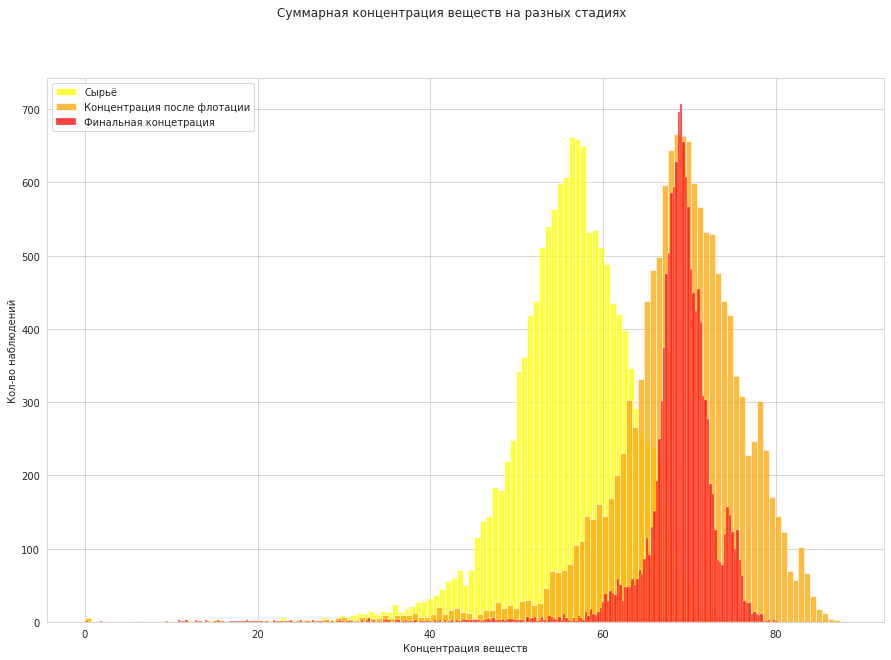

In [22]:
plt.figure(figsize=[15, 10])
plt.suptitle('Суммарная концентрация веществ на разных стадиях')
sns.set_style('whitegrid')
sns.histplot(total_feed_data, color='yellow', label='Сырьё', kde=False)
sns.histplot(total_concentrate_rougher, color='orange',label='Концентрация после флотации',kde=False)
sns.histplot(total_concentrate_final, color='red', label='Финальная концетрация', kde=False)
plt.xlabel('Концентрация веществ')
plt.ylabel('Кол-во наблюдений')
plt.legend()
plt.show()

- Суммарная концентрация веществ увеличивается к финалу, разброс распределения уменьшается

## Модель

### Функция для вычисления итоговой sMAPE

In [23]:
def smape(target, predictions):
    return sum(abs(predictions-target)/((abs(target)+abs(predictions))/2)) *(1/len(target))*100

smape_metric = make_scorer(smape, greater_is_better=False)

In [24]:
def final_smape(rougher, final):
    return (0.25 * rougher + 0.75 * final)

### Построение моделей

Предварительно исключим из тренировочной выборки признаки, отсутствующие в тестовой.  
Затем выделим целевой признак.

In [25]:
missed_features = missed_features - set(['rougher.output.recovery','final.output.recovery'])
train_data = train_data.drop(columns=missed_features, axis=1)

In [27]:
features_train = train_data.drop(['rougher.output.recovery','final.output.recovery'], axis=1)
target_train_rougher = train_data['rougher.output.recovery']
target_train_final = train_data['final.output.recovery']
models = {}

А теперь обучим разные модели и оценим их качество кросс-валидацией

#### Линейная регрессия

In [28]:
%%time
logreg_rougher = LinearRegression()
smape_rougher = cross_val_score(logreg_rougher, features_train, target_train_rougher,
                                scoring=smape_metric, cv=5).mean()

logreg_final = LinearRegression()
smape_final = cross_val_score(logreg_final, features_train, target_train_final,
                              scoring=smape_metric, cv=5).mean()

models['LogisticRegression'] = [final_smape(smape_rougher, smape_final)*(-1), 0]

CPU times: user 1.13 s, sys: 1.5 s, total: 2.63 s
Wall time: 2.54 s


#### Решающее дерево

In [29]:
%%time
good_score = 999
good_depth = -999

for depth in range(2,8):
    tree = DecisionTreeRegressor(max_depth=depth, random_state=42)
    smape_rougher = cross_val_score(tree, features_train, target_train_rougher,
                                    scoring=smape_metric, cv=5).mean()
    smape_final = cross_val_score(tree, features_train, target_train_final,
                                  scoring=smape_metric, cv=5).mean()
    final_score = final_smape(smape_rougher, smape_final)*(-1)
    if final_score < good_score:
        good_score = final_score
        good_depth = depth

models['DecisionTreeRegressor'] = [good_score, {'max_depth':good_depth}]

CPU times: user 14 s, sys: 22.8 ms, total: 14.1 s
Wall time: 14.2 s


#### Случайный лес

In [30]:
%%time
good_score = 999
good_depth = -999
good_est = -999

for depth in range(2,6):
    for n_est in range(10,90,20):
        forest = RandomForestRegressor(n_estimators=n_est, max_depth=depth, random_state=42)
        smape_rougher = cross_val_score(forest, features_train, target_train_rougher,
                                        scoring=smape_metric, cv=5).mean()
        smape_final = cross_val_score(forest, features_train, target_train_final,
                                        scoring=smape_metric, cv=5).mean()
        final_score = final_smape(smape_rougher, smape_final)*(-1)
        if final_score < good_score:
            good_score = final_score
            good_depth = depth
            good_est = n_est

models['RandomForestRegressor'] = [good_score, {'n_est':good_est, 'max_depth':good_depth}]

CPU times: user 12min 12s, sys: 2.35 s, total: 12min 14s
Wall time: 12min 14s


In [31]:
pd.DataFrame(data=models, index=['sMAPE', 'Parameters'])

,LogisticRegression,DecisionTreeRegressor,RandomForestRegressor
sMAPE,10.059261,8.925785,8.426047
Parameters,0.000000,{'max_depth': 3},"{'n_est': 70, 'max_depth': 4}"


На этих данных лучше всего показал себя RandomForestRegressor с параметрами n_estimators=70 и max_depth=4.  Применим эту модель на тестовой выборке.  

#### Тестовая выборка

Достанем целевой признак для тестовой выборки из полных данных

In [33]:
test_data = test_data.merge(full_data[['rougher.output.recovery', 'final.output.recovery']],
                            how = 'inner', on='date')

features_test = test_data.drop(['rougher.output.recovery', 'final.output.recovery', 'date'], axis=1)
target_test_rougher = test_data['rougher.output.recovery']
target_test_final = test_data['final.output.recovery']

In [35]:
forest_rougher = RandomForestRegressor(n_estimators=70, max_depth=4, random_state=42)
forest_rougher.fit(features_train, target_train_rougher)
predicted_rougher = forest_rougher.predict(features_test)

forest_final = RandomForestRegressor(n_estimators=70, max_depth=4, random_state=42)
forest_final.fit(features_train, target_train_final)
predicted_final = forest_final.predict(features_test)

final_smape_test = final_smape(
    smape(target_test_rougher, predicted_rougher),
    smape(target_test_final, predicted_final)
)

In [36]:
print(f'Итоговое sMAPE для тестовой выборки = {final_smape_test}')

Итоговое sMAPE для тестовой выборки = 7.34703835368718


In [37]:
dummy_rougher = DummyRegressor()
dummy_rougher.fit(features_train, target_train_rougher)
predicted_rougher = dummy_rougher.predict(features_test)

dummy_final = DummyRegressor()
dummy_final.fit(features_train, target_train_final)
predicted_final = dummy_final.predict(features_test)

final_smape_test = final_smape(
    smape(target_test_rougher, predicted_rougher),
    smape(target_test_final, predicted_final)
)

In [38]:
print(f'Итоговое sMAPE для тестовой выборки = {final_smape_test}')

Итоговое sMAPE для тестовой выборки = 7.765208540854134


**Промежуточный вывод:**
- Показатель sMAPE у модели случайного леса меньше, что говорит об адекватности построенной модели

## Вывод

В процессе работы мы подготовили данные, провели анализ содержания веществ на разных стадиях обработки руды, построили оптимальную модель машинного обучения и проверили её на адекватность.  
  
Были установлены закономерности, что в течение всего техпроцесса доля золота и свинца увеличивается, а серебра уменьшается. На этапах флотации и первичной очистки распределение размеров гранул сырья для обеих выборок находится приблизительно в одном диапазоне. Общее суммарное количество веществ уменьшается по мере прохождения этапов обработки.  
  
Наиболее подходящей моделью машинного обучения оказался RandomForestRegressor со sMAPE = 7.35, максимальной глубиной 4 и 70 деревьями.